In [16]:
import json
import requests
a = 'https://raw.githubusercontent.com/linwoodc3/gdeltPyR/master/utils/schema_csvs/cameoCodes.json'


In [6]:
import gdelt

gd = gdelt.gdelt(version=2)
events = gd.Search(['2017 May 23'],table='events',output='gpd',normcols=True,coverage=False)

In [15]:
!/Users/linwood/anaconda3/envs/myenv/bin/pip install --upgrade google-api-python-client

  Using cached google_api_python_client-1.6.2-py2.py3-none-any.whl
  Using cached uritemplate-3.0.0-py2.py3-none-any.whl
  Using cached oauth2client-4.1.0-py2.py3-none-any.whl
Requirement already up-to-date: six<2dev,>=1.6.1 in /Users/linwood/anaconda3/envs/myenv/lib/python3.5/site-packages (from google-api-python-client)
Requirement already up-to-date: rsa>=3.1.4 in /Users/linwood/.local/lib/python3.5/site-packages (from oauth2client<5.0.0dev,>=1.5.0->google-api-python-client)
Requirement already up-to-date: pyasn1>=0.1.7 in /Users/linwood/.local/lib/python3.5/site-packages (from oauth2client<5.0.0dev,>=1.5.0->google-api-python-client)
  Using cached pyasn1_modules-0.0.8-py2.py3-none-any.whl


In [66]:
keys = json.load(open('/Users/linwood/Desktop/keysforapps/apikeys.txt'))

In [70]:
from apiclient.discovery import build
service = build('bigquery', 'v2', developerKey=keys['google']['apikey']+"2")

In [101]:
from pandas.io import gbq
q="""
SELECT MonthYear,count(*)c,count(IF(Actor1Code LIKE 'MUS',1,null)) c_up
FROM [gdelt-bq.full.events] WHERE EventRootCode = '19'
GROUP BY MonthYear ORDER BY MonthYear;
"""

df = gbq.read_gbq(q, project_id='drivepython-150614')

Requesting query... ok.
Query running...
Query done.
Processed: 7.3 Gb

Retrieving results...
Got 461 rows.

Total time taken 2.53 s.
Finished at 2017-05-29 12:21:35.


In [102]:
df.sort_values('c_up',ascending=False)

,MonthYear,c,c_up
402,201207,201555,87
384,201101,169691,40
401,201206,194107,39
400,201205,197422,36
436,201505,337890,35
428,201409,335688,35
383,201012,164762,31
451,201608,440963,29
460,201705,314164,24
450,201607,476909,22


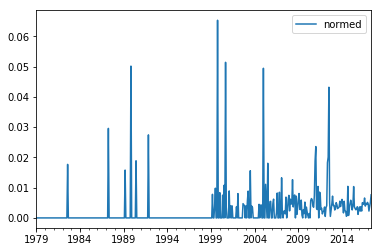

In [103]:
%matplotlib inline
import datetime
import numpy as np
np.datetime64('	197909')
# datetime.datetime.strptime()
df.set_index(df.apply(lambda x: datetime.datetime.strptime(str(x['MonthYear']),"%Y%m"),axis=1),inplace=True)#)datetime.datetime.strptime(x['MonthYear'],"%Y%m"),axis=1))
df.assign(normed=(df.c_up/df.c*100)).plot(y='normed')

In [10]:
events.groupby('actiongeofeatureid').size().sort_values(ascending=False)

actiongeofeatureid
531871      83
-2602512    55
-3093009    35
NY          32
CA          32
RS          27
-2960561    27
VA          26
US          26
TX          25
IS          23
10074674    22
-716583     21
MX          19
787504      18
MT          18
PA          17
-1908584    16
CH          16
IR          16
-2601889    16
11230301    15
SY          14
-1898541    14
-2762812    13
277593      13
OH          13
NZ          13
-1592100    13
955522      13
            ..
620133       1
-3391716     1
1022274      1
-3369796     1
670771       1
-3185482     1
723477       1
-3096949     1
-2996338     1
882272       1
597304       1
-575075      1
594790       1
581287       1
-95841       1
452346       1
-823958      1
-814876      1
465961       1
-804693      1
530857       1
-782831      1
-781545      1
-755097      1
531832       1
553758       1
-73211       1
-719485      1
-666773      1
1652484      1
dtype: int64